## Learning objectives
- Manipulate whole data frames by flipping them around, putting them together into one data frame
- Summarize lots of data with vectorized data frame operations to get statistics on multiple features at once
- Compare two features two each other (bivariate summaries and visualizations) 

In [7]:
pwd

'/Users/catherinetobia/ds4bio'

In [3]:
import pandas as pd

geno = pd.read_csv('../Data/arabmagic/arabmagic_geno.csv', skiprows = 3)
pheno = pd.read_csv('../Data/arabmagic/arabmagic_pheno.csv', skiprows = 3)
pmap = pd.read_csv('../Data/arabmagic/arabmagic_pmap_tair9.csv', skiprows = 3)


states = pd.read_csv("../Data/state_health.csv") 
states_named = states.set_index('State Name')

In [9]:
counts = pd.read_table("arabidopsis_birds/eco_data/species_counts.txt")
sites = pd.read_table('arabidopsis_birds/eco_data/eco_sites.txt')

In [143]:
geno.set_index("marker", inplace = True)
pheno.set_index("id", inplace = True)
pmap.set_index("marker", inplace = True)

## Daily homework
using the sites data, make histogram of how common each bird species is across all 38 sites.

HINT: if you make a dictionary  `bird` where the keys are species name and the value is the number of times that species is seen you can turn that into a data frame like this

    bird_df = pd.DataFrame(bird,index=['number sightings'])
    bird_df = bird_df.transpose()

The first line above will convert the dictionary to a data frame with index being 1 row, containing number of sightings. The second line above uses the transpose function to turn the data frame on its side so the features are in the columns and observations (bird species, here) are in the rows (By the way, this explanation of the code is a good explanation of what code does)

## 1. Manipulating data frames

### 1.1 Concatenate DataFrames `concat`
For multiple DataFrames of the same size on one dimension we can use the `pd.concat()` to mush them together into 1 DataFrame. 

The index and columns must match.

You don't always want to put all your data together like this, but sometimes it's useful. 

The input must be a  
1. `list` or other data structure containing multiple data and 
2. (recommended) do you want to do horizontal concatenation (add more columns to the same rows) axis = 1 or vertical (axis =0) (default is axis=0)

As always, I recommend Googling the documentation! 

**Exercise 1.1.1**: Concatenate the "sites" and "counts" data frames together. Which way did it append? Horizontally or vertically?

*Note*: I don't recommend keeping them together in this case-- it can be a  bit uncomfortable for beginners but I recommend keeping your data in different data frames if it makes more sense.

In [144]:
geno.shape

(1251, 703)

In [145]:
pheno.shape

(677, 8)

In [146]:
pmap.shape

(1251, 2)

In [18]:
sites_and_counts = pd.concat((sites, counts), axis = 1)

In [19]:
sites_and_counts

,Elevation,North,East,WorE,Macropygia_unchall,Streptopelia_chinensis,Streptopelia_senegalensis,Columba_pulchricollis,Streptopelia_orientalis,Chalcophaps_indica,...,Psarisomus_dalhousiae,Pitta_brachyura,Megalaima_australis,Caprimulgus_macrurus,Picus_xanthopygaeus,Cettia_pallidipes,Nyctyornis_athertoni,Pericrocotus_roseus,Psittacula_cyanocephala,Abroscopus_albogularis
A2,198.250000,26.978983,92.921975,E,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A3,734.250000,27.006267,92.404575,E,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A4,1243.250000,27.027496,92.410408,E,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
A6,2629.000000,27.147733,92.459379,E,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A7,2340.250000,27.091979,92.408567,E,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
A8,300.000000,26.961380,93.012160,E,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B1,1932.250000,27.061125,88.770667,E,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B2,164.250000,26.629383,89.582958,E,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
B3,153.500000,26.631250,89.583242,E,0,0,0,0,0,2,...,0,0,4,0,0,0,0,0,0,0
B4,209.750000,26.896422,88.855932,E,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Exercise 1.1.2**: For each of the following, predict what you will get as an output if you run the following code: what will be the shape of the resulting data frame? What is the index and columns? What do you think would be a desireable result to get? Does the result make sense?

First, we will take a subset of the states data

In [15]:
df1 = states_named.loc[:,['Poverty','Cancer']].head(10)
df2 = states_named.loc[:,['Exercise','Drive Alone to Work']].iloc[20:30,:]
df3 = states_named.loc[:,['Exercise','Drive Alone to Work']].iloc[40:50,:]

In [16]:
df1.head(5)

,Poverty,Cancer
State Name,,
Maine,10.9,8.1
Massachusetts,10.3,7.0
Rhode Island,11.9,6.8
District of Columbia,12.6,5.0
Michigan,12.6,7.6


*A*. Predict (shape, columns, index), then run it

In [34]:
#none of same states, missing info. Diff states used. Different features

In [35]:
#state_named already has the states set as the index

In [29]:
# four columns, 20 states

In [20]:
pd.concat((df1, df2))

,Poverty,Cancer,Exercise,Drive Alone to Work
State Name,,,,
Maine,10.9,8.1,NaN,NaN
Massachusetts,10.3,7.0,NaN,NaN
Rhode Island,11.9,6.8,NaN,NaN
District of Columbia,12.6,5.0,NaN,NaN
Michigan,12.6,7.6,NaN,NaN
New Hampshire,8.1,7.6,NaN,NaN
Vermont,10.8,7.0,NaN,NaN
Pennsylvania,11.9,7.9,NaN,NaN
Connecticut,10.4,7.4,NaN,NaN


*B*. Predict (shape, columns, index), then run it

In [36]:
#a lot of NaN, not lined up correctly. 

In [30]:
# four columns, 20 states

In [23]:
pd.concat((df3, df2),axis=1)

,Exercise,Drive Alone to Work,Exercise,Drive Alone to Work
State Name,,,,
Alaska,25.6,70.0,NaN,NaN
Kansas,20.8,82.7,NaN,NaN
Montana,28.3,76.2,NaN,NaN
Arizona,25.5,75.6,NaN,NaN
Illinois,23.4,72.4,NaN,NaN
New Mexico,25.7,80.7,NaN,NaN
Idaho,21.7,78.3,NaN,NaN
Wisconsin,24.7,80.8,NaN,NaN
Texas,24.3,80.1,NaN,NaN


*C*. Predict (shape, columns, index), then run it

In [31]:
#lined up correctly, same features

In [32]:
# two columns, 20 states

In [25]:
pd.concat((df3, df2),axis=0)

,Exercise,Drive Alone to Work
State Name,,
Alaska,25.6,70.0
Kansas,20.8,82.7
Montana,28.3,76.2
Arizona,25.5,75.6
Illinois,23.4,72.4
New Mexico,25.7,80.7
Idaho,21.7,78.3
Wisconsin,24.7,80.8
Texas,24.3,80.1


*D*. Predict (shape, columns, index) then run it:

In [27]:
#same as above, just different order

In [28]:
pd.concat((df2, df3),axis=0)

,Exercise,Drive Alone to Work
State Name,,
Kentucky,15.3,82.0
Tennessee,21.8,82.0
Oregon,24.9,71.5
Utah,24.9,76.1
Iowa,20.0,80.2
Washington,25.9,70.9
United States,23.0,75.9
Ohio,20.9,82.4
Colorado,27.4,74.2


**Self-check**: Get the 15 top and 10 bottom poverty states. Then concatenate these together into one data frame. Which way should it concatenate?

**Self-check**: Use the eco_data from Oct 14. Concatenate the bird counts and site info and then sort by count of Streptopelia_chinensis to find what the average elevation is for the 5 places with the most of that bird.

### 1.2 `transpose()` 
Flips the rows and the columns:

In [37]:
states.head().transpose()

,0,1,2,3,4
State Name,Maine,Massachusetts,Rhode Island,District of Columbia,Michigan
Adverse Childhood Experiences,18.2,10.8,13.6,17.5,15.5
Air Pollution,5.0,7.0,7.0,8.7,7.9
Arthritis,29.0,23.8,24.2,16.3,30.1
Asthma,10.6,10.7,12.1,10.4,11.0
...,...,...,...,...,...
Volunteerism,38.5,33.6,28.3,40.7,34.5
Voter Participation (Average),68.5,60.9,59.0,72.6,63.2
Voter Participation (Midterm),65.6,55.5,51.6,61.1,59.5
Voter Participation (Presidential),71.3,66.3,66.3,84.0,66.9


**Exercise 1.2.1**: Predict what will be the shape of the `sites` data frame after we run transpose. Then, get the actual shape and compare.

In [38]:
sites.head()

,Elevation,North,East,WorE
A2,198.25,26.978983,92.921975,E
A3,734.25,27.006267,92.404575,E
A4,1243.25,27.027496,92.410408,E
A6,2629.00,27.147733,92.459379,E
A7,2340.25,27.091979,92.408567,E


In [40]:
sites.shape

(38, 4)

In [41]:
#it would have 4 features in the rows and 38 sites columns

In [43]:
sites.transpose().shape

(4, 38)

## 2. Doing research with genotype-phenotype data
As a group, discuss:
1. How many plants do we have information on?
2. what information do we have on each plant
3. think of one research question could we ask with the Arabidopsis MAGIC data. Pick one person to take notes. We will share with the class after 5 minutes discussion.

In [56]:
#703 plants
#we know what markers are on each plant (out of 1251), phenotypic features

In [54]:
#can find what genes are common between our plants
    #are there common genes between tall plants?

In [44]:
geno.head()

,MAGIC.1,MAGIC.10,MAGIC.100,MAGIC.101,MAGIC.102,MAGIC.103,MAGIC.104,MAGIC.105,MAGIC.106,MAGIC.107,...,MAGIC.694,MAGIC.695,MAGIC.696,MAGIC.697,MAGIC.698,MAGIC.699,MAGIC.700,MAGIC.701,MAGIC.702,MAGIC.703
marker,,,,,,,,,,,,,,,,,,,,,
MN1_29291,A,A,A,B,B,A,A,B,A,A,...,B,A,B,A,B,B,B,B,A,A
MN1_29716,A,A,A,B,B,A,A,B,A,A,...,B,A,B,A,B,B,B,B,A,A
MN1_112907,A,A,A,B,B,A,A,B,A,A,...,B,A,B,A,B,B,B,B,A,B
MASC03771,A,B,A,A,B,A,A,A,A,A,...,A,A,B,A,A,A,A,A,A,B
MN1_197787,A,B,A,B,B,A,A,B,A,A,...,A,A,B,A,B,A,A,B,A,A


In [53]:
geno.shape

(1251, 703)

In [45]:
pheno.head()

,bolting_days,seed_weight,seed_area,ttl_seedspfruit,branches,height,pc_seeds_aborted,fruit_length
id,,,,,,,,
MAGIC.1,15.33,17.15,0.64,45.11,10.50,NaN,0.00,14.95
MAGIC.2,22.00,22.71,0.75,49.11,4.33,42.33,1.09,13.27
MAGIC.3,23.00,21.03,0.68,57.00,4.67,50.00,0.00,13.90
MAGIC.4,18.67,22.45,0.74,54.33,6.33,NaN,0.23,15.93
MAGIC.5,18.67,25.36,0.82,38.33,5.67,42.25,0.00,12.81


In [47]:
pheno.shape

(677, 8)

In [46]:
pmap.head()

,chr,pos
marker,,
MN1_29291,1,0.029291
MN1_29716,1,0.029757
MN1_112907,1,0.112907
MASC03771,1,0.174605
MN1_197787,1,0.197787


In [49]:
pmap.shape

(1251, 2)

In [48]:
#genetic marker, phenotypic features, chromosome location, position of the gene on chromosome

## 3. Cleaning your data
As a group figure out what steps you could take to make the Arabidopsis data all have same observations in the same rows and features in the columns (note that  the pmap is not observations in this case but metadata). Keep them in separate data frames!

In [58]:
geno_flip = geno.transpose()
pd.concat((geno_flip, pheno), axis = 1)

,MN1_29291,MN1_29716,MN1_112907,MASC03771,MN1_197787,MN1_340810,MN1_395107,MN1_444820,MN1_494205,MN1_592863,...,MN5_26877341,MN5_26877463,bolting_days,seed_weight,seed_area,ttl_seedspfruit,branches,height,pc_seeds_aborted,fruit_length
MAGIC.1,A,A,A,A,A,A,A,A,A,A,...,A,A,15.33,17.15,0.64,45.11,10.50,NaN,0.00,14.95
MAGIC.10,A,A,A,B,B,B,A,A,A,B,...,A,A,30.00,30.46,0.91,56.33,3.00,48.50,0.41,18.63
MAGIC.100,A,A,A,A,A,A,A,NaN,A,A,...,A,A,38.33,23.59,0.76,53.33,8.67,51.43,0.00,16.36
MAGIC.101,B,B,B,A,B,A,A,A,A,A,...,A,A,17.00,23.20,0.75,64.00,5.67,NaN,0.36,17.65
MAGIC.102,B,B,B,B,B,A,B,A,A,A,...,A,A,15.67,22.12,0.72,55.56,7.33,41.75,0.00,16.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAGIC.699,B,B,B,A,A,A,A,A,A,A,...,A,A,27.67,17.17,0.46,47.22,8.00,43.17,0.21,15.13
MAGIC.700,B,B,B,A,A,A,A,A,A,A,...,B,B,27.67,18.46,0.97,48.89,7.00,47.73,0.49,NaN
MAGIC.701,B,B,B,A,B,A,A,A,A,A,...,A,A,26.50,21.62,0.66,54.20,3.50,38.57,0.00,15.98
MAGIC.702,A,A,A,A,A,A,A,A,A,A,...,B,B,15.33,20.19,0.40,102.00,4.67,45.20,0.00,17.19


In [65]:
#need vertical concat, there would be NaN for ones in geno and not pheno

In [83]:
geno.head()

,MAGIC.1,MAGIC.10,MAGIC.100,MAGIC.101,MAGIC.102,MAGIC.103,MAGIC.104,MAGIC.105,MAGIC.106,MAGIC.107,...,MAGIC.694,MAGIC.695,MAGIC.696,MAGIC.697,MAGIC.698,MAGIC.699,MAGIC.700,MAGIC.701,MAGIC.702,MAGIC.703
marker,,,,,,,,,,,,,,,,,,,,,
MN1_29291,A,A,A,B,B,A,A,B,A,A,...,B,A,B,A,B,B,B,B,A,A
MN1_29716,A,A,A,B,B,A,A,B,A,A,...,B,A,B,A,B,B,B,B,A,A
MN1_112907,A,A,A,B,B,A,A,B,A,A,...,B,A,B,A,B,B,B,B,A,B
MASC03771,A,B,A,A,B,A,A,A,A,A,...,A,A,B,A,A,A,A,A,A,B
MN1_197787,A,B,A,B,B,A,A,B,A,A,...,A,A,B,A,B,A,A,B,A,A


In [85]:
geno[pheno.transpose().columns].transpose()

marker,MN1_29291,MN1_29716,MN1_112907,MASC03771,MN1_197787,MN1_340810,MN1_395107,MN1_444820,MN1_494205,MN1_592863,...,MN5_26029439,MN5_26121184,MN5_26220737,MN5_26379737,MN5_26380009,MN5_26437895,MN5_26438023,MN5_26708459,MN5_26877341,MN5_26877463
MAGIC.1,A,A,A,A,A,A,A,A,A,A,...,A,A,B,A,B,A,A,A,A,A
MAGIC.2,A,A,B,B,A,A,A,B,B,A,...,A,A,A,A,A,A,A,B,A,A
MAGIC.3,A,A,B,A,A,A,A,A,A,B,...,A,A,B,A,B,H,A,A,A,A
MAGIC.4,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
MAGIC.5,B,B,B,A,B,B,A,B,B,A,...,B,A,A,A,A,A,A,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAGIC.699,B,B,B,A,A,A,A,A,A,A,...,A,B,B,B,A,B,B,A,A,A
MAGIC.700,B,B,B,A,A,A,A,A,A,A,...,A,B,B,B,A,B,B,A,B,B
MAGIC.701,B,B,B,A,B,A,A,A,A,A,...,B,A,A,A,B,A,A,A,A,A
MAGIC.702,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,B,B


In [105]:
geno_t = geno[pheno.index].transpose()

## 4. Vectorized operations across multiple rows/columns
We previously learned about vectorized operations on a Series. 
We can do the same thing across all rows/column in a DataFrame.

In [87]:
pheno.sum()

bolting_days        15876.52
seed_weight         14998.86
seed_area             501.48
ttl_seedspfruit     35521.49
branches             3893.63
height              21479.24
pc_seeds_aborted      616.93
fruit_length        10070.50
dtype: float64

In [90]:
pheno.sum(axis = 1)

id
MAGIC.1      103.68
MAGIC.2      155.59
MAGIC.3      170.28
MAGIC.4      118.68
MAGIC.5      143.91
              ...  
MAGIC.699    159.03
MAGIC.700    151.21
MAGIC.701    161.03
MAGIC.702    204.98
MAGIC.703    170.00
Length: 677, dtype: float64

In [88]:
pheno.mean()

bolting_days        23.451285
seed_weight         22.154889
seed_area            0.741834
ttl_seedspfruit     52.468966
branches             5.811388
height              41.788405
pc_seeds_aborted     0.911270
fruit_length        14.941395
dtype: float64

In [94]:
pheno.mean(axis = 1)
#the average of all the features per plant

id
MAGIC.1      14.811429
MAGIC.2      19.448750
MAGIC.3      21.285000
MAGIC.4      16.954286
MAGIC.5      17.988750
               ...    
MAGIC.699    19.878750
MAGIC.700    21.601429
MAGIC.701    20.128750
MAGIC.702    25.622500
MAGIC.703    21.250000
Length: 677, dtype: float64

In [93]:
counts.mean(axis = 1)

A2    0.453947
A3    0.565789
A4    0.786184
A6    0.782895
A7    0.720395
A8    0.309211
B1    0.819079
B2    0.368421
B3    0.338816
B4    0.302632
B5    0.628289
D1    0.282895
D3    0.088816
G1    0.539474
J1    0.440789
J2    0.381579
J4    0.421053
J5    0.177632
J6    0.391447
K1    0.453947
K2    0.513158
K4    0.111842
K5    0.236842
K6    0.394737
L1    0.381579
M1    0.493421
M2    0.565789
M3    0.476974
M4    0.059211
N1    0.690789
N2    0.407895
N3    0.368421
S1    0.585526
U3    0.384868
U4    0.095395
MA    0.328947
U1    0.605263
U2    0.388158
dtype: float64

By default, it operates on each column. We can make it operate on the rows using the `axis` argument. In pandas axis 0 is rows and axis 1 is columns. So axis=1 means we are summing *across columns*. What do these numbers represent?

In [ ]:
pheno.mean(axis=1)

**Self-check**: Using the eco_sites data, get the maximum values for the features of the sites (location, elevation), across all sites.

**Exercise 4.1**: Use vectorized DataFrame operations to calculate the difference in mean value of all phenotypes between plants with MN1_444820 is A and those where it is not A. **Write down an algorithm first**

In [95]:
pd.concat((geno[pheno.transpose().columns].transpose(), pheno), axis = 1)

,MN1_29291,MN1_29716,MN1_112907,MASC03771,MN1_197787,MN1_340810,MN1_395107,MN1_444820,MN1_494205,MN1_592863,...,MN5_26877341,MN5_26877463,bolting_days,seed_weight,seed_area,ttl_seedspfruit,branches,height,pc_seeds_aborted,fruit_length
MAGIC.1,A,A,A,A,A,A,A,A,A,A,...,A,A,15.33,17.15,0.64,45.11,10.50,NaN,0.00,14.95
MAGIC.2,A,A,B,B,A,A,A,B,B,A,...,A,A,22.00,22.71,0.75,49.11,4.33,42.33,1.09,13.27
MAGIC.3,A,A,B,A,A,A,A,A,A,B,...,A,A,23.00,21.03,0.68,57.00,4.67,50.00,0.00,13.90
MAGIC.4,A,A,A,A,A,A,A,A,A,A,...,A,A,18.67,22.45,0.74,54.33,6.33,NaN,0.23,15.93
MAGIC.5,B,B,B,A,B,B,A,B,B,A,...,B,B,18.67,25.36,0.82,38.33,5.67,42.25,0.00,12.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAGIC.699,B,B,B,A,A,A,A,A,A,A,...,A,A,27.67,17.17,0.46,47.22,8.00,43.17,0.21,15.13
MAGIC.700,B,B,B,A,A,A,A,A,A,A,...,B,B,27.67,18.46,0.97,48.89,7.00,47.73,0.49,NaN
MAGIC.701,B,B,B,A,B,A,A,A,A,A,...,A,A,26.50,21.62,0.66,54.20,3.50,38.57,0.00,15.98
MAGIC.702,A,A,A,A,A,A,A,A,A,A,...,B,B,15.33,20.19,0.40,102.00,4.67,45.20,0.00,17.19


In [114]:
#make a boolean of everything in geno_t where marker is A
#search the pheno where the boolean is true and find the mean of those phenotypes
    #flip for false

In [112]:
geno_t = geno[pheno.index].transpose()

In [147]:
geno_t.shape

(677, 1251)

In [110]:
A_true = geno_t.loc[:,'MN1_444820'] == 'A'

In [119]:
true_avg = pheno[A_true].mean()

In [120]:
false_avg = pheno[~A_true].mean()

In [121]:
true_avg - false_avg

bolting_days       -2.062461
seed_weight         0.397926
seed_area           0.003205
ttl_seedspfruit     0.718957
branches           -0.207432
height              1.487050
pc_seeds_aborted    0.340365
fruit_length        0.197933
dtype: float64

**Exercise 4.2**: Instead of just MN1_444820, calculate the difference in mean for **all** genotypes. Save the result into a new DataFrame where the rows are markers and the columns are phenotypes.  **Write down an algorithm first**

In [133]:
#make an empty dictionary
#make a varibale with a list of all gene markers
#using a for loop, find plants where genotype is A for each gene marker
#and find plants where genotype is not A for each gene marker
#find mean values for each phenotype for each marker and find the difference between the above lists
#add to dictionary: marker as key, and series of difference in phenotypes as values

In [4]:
marker_dict={}
for marker in geno.index:
    As=geno.loc[marker,]=='A'
    mean_As=pheno.loc[As,].mean()
    
    not_As=geno.loc[marker,]!='A'
    mean_not_As=pheno.loc[not_As,].mean()
    
    difference=mean_As-mean_not_As
    marker_dict[marker]=difference
gwas = pd.DataFrame(marker_dict).transpose()
gwas

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

**Exercise 4.3**: Discuss as a group. What is the meaning of the values in the DataFrame created in 4.2? How could you find some kind of interesting result from this DataFrame?

In [73]:
gwas_flip = gwas.transpose()

In [74]:
gwas.sort_values("bolting_days").head(5)
gwas.max(axis=1)

MN1_29291       1.293126
MN1_29716       1.293126
MN1_112907      1.195726
MASC03771       1.846814
MN1_197787      2.811966
                  ...   
MN5_26437895    1.002619
MN5_26438023    1.426939
MN5_26708459    2.726329
MN5_26877341    0.627625
MN5_26877463    0.627625
Length: 1251, dtype: float64

In [75]:
gwas.sort_values("bolting_days").tail(5)

,bolting_days,seed_weight,seed_area,ttl_seedspfruit,branches,height,pc_seeds_aborted,fruit_length
FLC_5907,4.928915,0.600585,0.017640,-2.260444,0.368688,-1.084294,0.390208,-0.353250
MASC02783,4.931088,0.294483,0.009741,-1.786702,0.377546,1.397560,0.300092,-0.128675
NMSNP4_1585200,4.983572,0.485799,0.017254,-1.302699,-0.033729,2.441612,0.574553,0.585926
GA1_5420,5.449309,0.268668,0.012642,-0.951035,0.275077,-1.743115,-0.224903,-0.179542
FRI_725,5.759159,0.304326,0.015654,-3.233291,0.162892,-0.265187,-0.081768,-0.122069


### 4.1 Combining data frames for certain analyses

**Exercise 4.1.1**: Let's put together our GWAS results with the pmap info into one data frame, with markers in the rows and GWAS results + chromosome + position in the columns. Call this data frame `gwas_plus_pmap`. If you're not sure how to do it, Google for the pandas documentation (make suer to check the version to make sure.

In [76]:
pd.__version__

'1.3.4'

In [77]:
gwas_plus_pmap = pd.concat((pmap,gwas),axis=1)
gwas_plus_pmap

,chr,pos,bolting_days,seed_weight,seed_area,ttl_seedspfruit,branches,height,pc_seeds_aborted,fruit_length
MN1_29291,1,0.029291,1.293126,-0.068388,-0.003500,1.263866,0.295680,0.476892,-0.232567,0.219775
MN1_29716,1,0.029757,1.293126,-0.068388,-0.003500,1.263866,0.295680,0.476892,-0.232567,0.219775
MN1_112907,1,0.112907,1.195726,-0.193139,-0.004987,0.835984,0.200622,-0.340010,-0.179614,0.361271
MASC03771,1,0.174605,-1.844612,-0.480599,-0.011698,1.846814,0.025621,-0.244310,0.363836,0.393748
MN1_197787,1,0.197787,-1.381036,-0.973285,-0.023788,1.848979,0.192652,2.811966,0.037710,0.391494
...,...,...,...,...,...,...,...,...,...,...
MN5_26437895,5,26.420670,1.002619,0.909351,0.022294,-1.640437,-0.226095,0.941392,0.141553,0.093135
MN5_26438023,5,26.420798,1.426939,0.990801,0.022686,-1.469499,-0.330995,0.555992,0.263476,-0.010135
MN5_26708459,5,26.691233,-3.322726,-0.102616,-0.009087,2.726329,-0.134728,1.113595,0.293149,0.109211
MN5_26877341,5,26.860115,0.627625,-0.346788,-0.004810,0.384560,-0.083017,0.186449,-0.007434,0.178235


**Exercise 4.1.2**: Find the chromosome for the 5 top markers where genotype A increases fruit_length. 

In [78]:
top_markers = gwas_plus_pmap.sort_values('fruit_length',ascending=False).head()
set(top_markers['chr'])

{2}

In [79]:
set((gwas_plus_pmap.sort_values("fruit_length").tail(5))["chr"])
#ugh = gwas_plus_pmap.sort_values("fruit_length").tail(5)
#this = list(ugh.index)

{2}

**Exercise 4.1.3**: make a data frame called `fruit_length_geno` containing the genotypes for top 5 markers for association with fruit_length, concatenated with the phenotype data. 

In [80]:
top_geno = geno.loc[top_markers.index]
fruit_length_geno = pd.concat((top_geno.transpose(), pheno), axis = 1)
fruit_length_geno.head()

,MASC06116,MASC02863,FES1_3177,RAX2_405,MASC05402,bolting_days,seed_weight,seed_area,ttl_seedspfruit,branches,height,pc_seeds_aborted,fruit_length
MAGIC.1,A,A,A,A,A,15.33,17.15,0.64,45.11,10.50,NaN,0.00,14.95
MAGIC.10,A,A,A,A,A,30.00,30.46,0.91,56.33,3.00,48.50,0.41,18.63
MAGIC.100,A,A,A,A,A,38.33,23.59,0.76,53.33,8.67,51.43,0.00,16.36
MAGIC.101,A,A,A,A,A,17.00,23.20,0.75,64.00,5.67,NaN,0.36,17.65
MAGIC.102,A,A,A,A,A,15.67,22.12,0.72,55.56,7.33,41.75,0.00,16.52


In [150]:
#Able to see trends in the genotype that match the trends in the phenotype
    #More plants have A at hw marker, those that have A are on average longer
    
#if you gathered more observations of plants, those you found with A would probably
#be longer than those without

# 5. Plots of two or more features

Bivariate plots allow us to compare two or more features for each data point.

The most intuitive is a scatter plot which we can make with `relplot` 

Remember, seaborn takes as input a data frame, and will plot entries from its **columns**:

In [151]:

import seaborn as sns
sns.set_theme()  ## the default theme with a grid

In [152]:
pheno.head()

,bolting_days,seed_weight,seed_area,ttl_seedspfruit,branches,height,pc_seeds_aborted,fruit_length
id,,,,,,,,
MAGIC.1,15.33,17.15,0.64,45.11,10.50,NaN,0.00,14.95
MAGIC.2,22.00,22.71,0.75,49.11,4.33,42.33,1.09,13.27
MAGIC.3,23.00,21.03,0.68,57.00,4.67,50.00,0.00,13.90
MAGIC.4,18.67,22.45,0.74,54.33,6.33,NaN,0.23,15.93
MAGIC.5,18.67,25.36,0.82,38.33,5.67,42.25,0.00,12.81


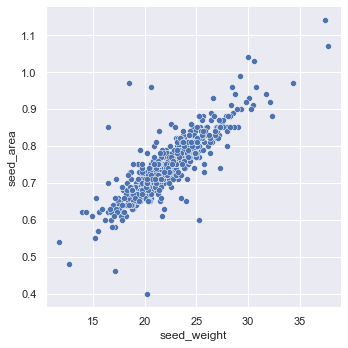

In [153]:
sns.relplot(
    data=pheno,
    x="seed_weight", 
    y="seed_area"
)

In [154]:
#relplot makes a scatter plot
    #on quizes and final:
        #axises, points in plot, observations, features

**Exercise 5.1**: What are the axes? What are the points on this plot?

**Exercise 5.2**: What is your interpretation of this plot? Is this how you expect the plot to look?

In [155]:
#each point: each plant
#obs: plant
#features: seed area and seed weight
#axises: seed weight and seed area

In [156]:
#As seed weight goes up, so does the seed area
#Yes this is what you would expect, a bigger seed should have a bigger area

We can use "hue" and "size" to add more dimensions to our 2-D plots using color or point size. Just like with plot we specify our x and y axis, but then we can specify the color of each point:

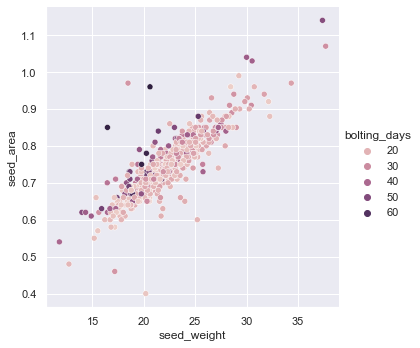

In [157]:
sns.relplot(
    data=pheno,
    x="seed_weight", 
    y="seed_area",
    hue = "bolting_days"
)

In [159]:
#features: seed weight, area, AND bolting days
#obs: each plant

**Exercise 5.3**: what do you see when you add the bolting days dimension?

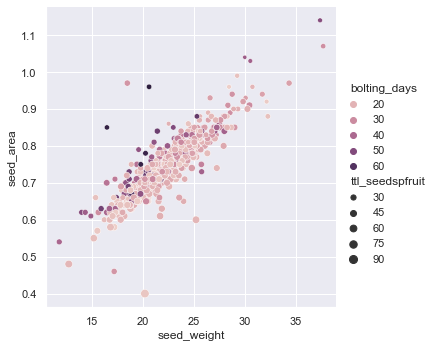

In [160]:
sns.relplot(
    data=pheno,
    x="seed_weight", y="seed_area",
    hue = "bolting_days",
    size = "ttl_seedspfruit"
)

In [161]:
#features: seed weight, area, bolting days, AND seeds per fruit

#Kind of hard to see with all the features going on

**Exercise 5.4**: How many observations and features are there in this plot?

### 5.1 Bivariate plots with a number and a binary/categorical feature

Going back to our Arabidopsis, we are interested in the effect of genotype on phenotype. We created the data frame `fruit_length_geno`. 


What are the features in this subset of the data?

In [81]:
fruit_length_geno

,MASC06116,MASC02863,FES1_3177,RAX2_405,MASC05402,bolting_days,seed_weight,seed_area,ttl_seedspfruit,branches,height,pc_seeds_aborted,fruit_length
MAGIC.1,A,A,A,A,A,15.33,17.15,0.64,45.11,10.50,NaN,0.00,14.95
MAGIC.10,A,A,A,A,A,30.00,30.46,0.91,56.33,3.00,48.50,0.41,18.63
MAGIC.100,A,A,A,A,A,38.33,23.59,0.76,53.33,8.67,51.43,0.00,16.36
MAGIC.101,A,A,A,A,A,17.00,23.20,0.75,64.00,5.67,NaN,0.36,17.65
MAGIC.102,A,A,A,A,A,15.67,22.12,0.72,55.56,7.33,41.75,0.00,16.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAGIC.699,A,A,A,A,A,27.67,17.17,0.46,47.22,8.00,43.17,0.21,15.13
MAGIC.700,A,A,A,A,A,27.67,18.46,0.97,48.89,7.00,47.73,0.49,NaN
MAGIC.701,A,A,A,A,A,26.50,21.62,0.66,54.20,3.50,38.57,0.00,15.98
MAGIC.702,A,A,A,A,A,15.33,20.19,0.40,102.00,4.67,45.20,0.00,17.19


Instead of just looking at fruit length by itself, we can compare fruit lengths of different subsets by using the `col` option to make two columns in your plot, separated by value of marker MASC06116. So instead of the regular bins for different values of fruit length, we have bins of BOTH fruit length and MASC06116:

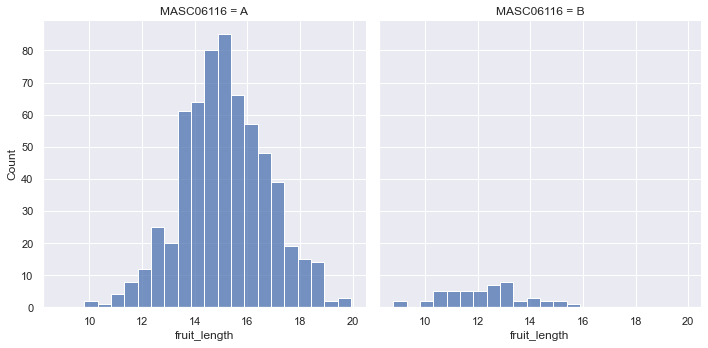

In [84]:
sns.set_theme('notebook')
sns.displot(data=fruit_length_geno, 
            x="fruit_length", col='MASC06116')

**Exercise 5.1.1**: What do you see? What are the axes? What are the different plots? What are the bars? What is the interpretation?

It's hard to see what's the same or different because way more plants have A genotype than B genotype. We can try to convert from total numbers to fractions

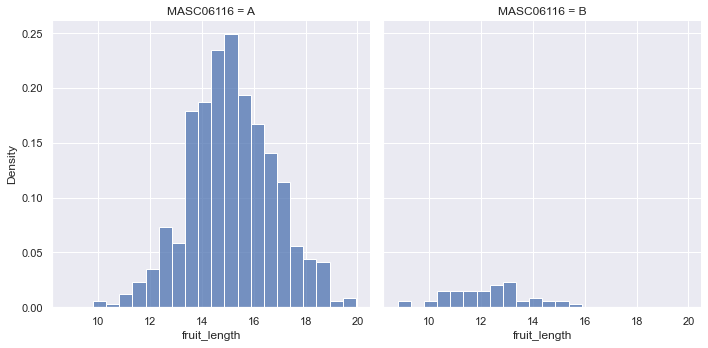

In [85]:
sns.displot(data=fruit_length_geno, 
            x="fruit_length", 
            col='MASC06116',
            stat='density')

**Exercise 5.1.2**: What changed? 

Still, it would be nice if they were on the same scale as fractions.

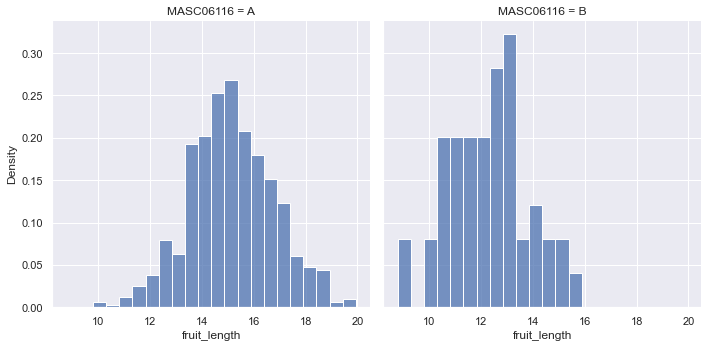

In [86]:
sns.displot(data=fruit_length_geno, 
            x="fruit_length", 
            col='MASC06116',
            stat='density',
            common_norm=False)

**Exercise 5.1.3**: what do you think `common_norm` does?

We can also put them on the same axis with different colors by changinge `col` to `hue`. This still keeps them in separate bins but just on the same plot:

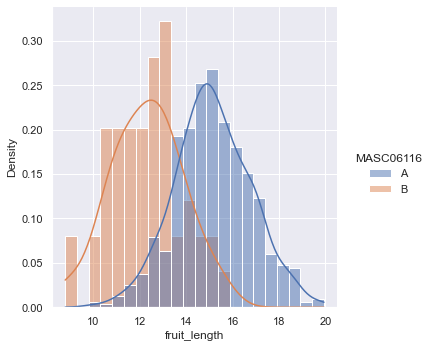

In [87]:
sns.displot(data=fruit_length_geno, x="fruit_length", hue='MASC06116',stat='density',common_norm=False, kde=True)

We can add a smoothed line onto this displot (or any displot) with `kde=True`

In [ ]:
sns.displot(data=fruit_length_geno, x="fruit_length", hue='MASC06116',stat='density',common_norm=False, kde=True)

## 5.2 Scatter plots of multiple panels & back to our GWAS
Now that it's together in one dataframe. 

Remember seabon can plot different columns in a dataframe. We can use seaborn to plot our GWAS results by genomic position using our combined data frame:

In [ ]:
gwas_plus_pmap

In [ ]:
sns.relplot(
    data=gwas_plus_pmap,
    x="pos", y="fruit_length",
    col = "chr"
)

**Exercise 6.1**: As a group, answer these questions, discuss for 5 minutes
- What are the various subplots?
- What are the axes?
- What are the points?
- Which chromosome is the biggest and smallest?
- What can we conclude from this data about the association of genotype with the phenotype?

## Exercise 5
We will get practice with **vectorized string operations** to find the strings in a series that match some criterion, and use this to do some analysis of the birds data. This includes `startswith`, `endswith`, and `contains`.

To use these you have to access the string functions of a series, using `.str` as follows.

In [ ]:

tenstates = states['State Name'].head(10)
tenstates

In [ ]:
tenstates.str.startswith("M")

In [ ]:
tenstates.str.endswith("re")

In [ ]:
tenstates.str.contains("nn")

**Exercise 5.1**: Make a series containing info for every site about *whether or not* it has any of the Megalaima (any bird species with Megalaima in its name).

**Exercise 5.2**: Make a data frame `sites_mega` that contains the information about the site and *whether or not* the site contains Megalaima. You can convert a series to a data frame by using the function `pd.DataFrame(series_variable)`

Of course you could always assign the series back into the data frame but I want you to get some practice with `concat`:

In [ ]:
sites['has_mega'] = mega_df.sum(axis=1) > 0


**Exercise 5.2**: Use the data frame you made above to make one plot for each feature comparing sites that do or don't have megalaima.

In [ ]:
sns.catplot(x="MASC06116", y="fruit_length", data=sites)


**Exercise 5.3**: Get the mean elevation for sites that have megalaima and sites that don't

In [ ]:
sns.catplot(x="MASC06116", y="fruit_length", data=sites)

# Extra material on `apply` -- you don't need this for this class
While those built-in functions like `mean`, etc, will take you a long way toward summarizing your data frame, we have a lot of flexibility with `apply`. 

This is a DataFrame function that can take any function that is applied to one row or column (series) and apply that across all of them.

you use it by: 
` df.apply( func_name, axis = axis number, [any other inputs to the function named func_name]) `

In [125]:
import numpy as np

In [126]:
b = pheno.apply(np.percentile,  ## using the np.percentile function
                axis=0,  ## across rows
                q=[10, 25,50,75,90] ### also inputting the percentiles we want
               )

In [127]:
b

,bolting_days,seed_weight,seed_area,ttl_seedspfruit,branches,height,pc_seeds_aborted,fruit_length
0,15.67,18.650,NaN,40.560,NaN,NaN,0.00,NaN
1,17.33,20.240,NaN,47.000,NaN,NaN,0.00,NaN
2,20.33,21.910,NaN,53.000,NaN,NaN,0.22,NaN
3,24.67,23.830,NaN,58.890,NaN,NaN,0.64,NaN
4,38.73,25.694,NaN,62.934,NaN,NaN,1.67,NaN


Compare this with our `perc_seeds` variable above. 

**Self-check**: Use apply with np.max on the pheno dataframe to get the maximum value of each phenotype. Verify that the result is the same as if you used regular vectorized operations.

In [ ]:
b = pheno.apply(np.max,  ## using the np.percentile function
                axis=0
               )
b

In [ ]:
pheno.max()

## Extra.1 `lambdas`
This below is one way to get the difference in phenotypes among plants at each genotype. This is what we did yesterday:

In [ ]:
gwas.head()

**Self-check**: Go through the code above and add comments explaining what it is doing. Verify that your comments are correct by copying bits of the code into a code cell and running it and inspecting the resulting values (for example, start by assigning `i="MN1_29291"` and run the code inside of the for loop)

We always want to avoid `for` loops if we can though! We will try to use `apply` instead, but we need something that can be applied just like `np.percentile` was.
Lambdas are functions that don't have a name and are usually one line long. Instead of using `def` we use `lambda`.

Here is a `lambda` that will take as input one genotype vector/Series, `x`. It splits the `pheno` DataFrame into those plants with genotype A and those plants without it: 

In [128]:
lambda x: pheno.loc[x=='A',:].mean() - pheno.loc[x!='A',:].mean()

<function __main__.<lambda>(x)>

We can store a lambda in a variable. 

In [129]:
diff_phe = lambda x: pheno.loc[x=='A',:].mean() - pheno.loc[x!='A',:].mean()

In [130]:
diff_phe

<function __main__.<lambda>(x)>

And then use it to `apply` across each **marker**: so logically, for each marker, we are separating the plants by their genotype at that marker, and looking at the difference in mean phenotypes

In [ ]:
gwas =  geno.apply(diff_phe,
                   axis=1)

Or, you can put it all on one line:

In [ ]:
gwas =  geno.apply(lambda x: pheno.loc[x=='A',:].mean() - pheno.loc[x!='A',:].mean(),
                   axis=1)

## Extra.2 Matplotlib
Matplotlib has more flexibility than seaborn. Seaborn is nice for certain built-in things, but matplotlib you can make any plot. Here are some examples.

In [ ]:
import matplotlib.pyplot as plt

## the line below allows us to see our plots inside jupyter
%matplotlib inline 

In [ ]:
x = pheno['seed_weight']
y = pheno['seed_area']
plt.plot(x, y,'.')

**Self-check**: Add comments to the code above. Copy the same code and try changing what is plotted to plot two different phenotypes.

We can make multiple plots using `subplots` function which gives you back a `figure` and `axis` object.

We can additionally use the `axis` object to set the x and y label of the axes:

In [ ]:
x = pheno['seed_weight']
y = pheno['seed_area']

figure ,axis = plt.subplots(1)
axis.plot(x, y,'.')
axis.set_xlabel('seed_weight')
axis.set_ylabel('seed_area')

We can create a grid of subplots using the `subplots` function specifying the number of rows and columns (here 2 rows). The `subplots` function returns both the figure and a `list` of axes. We use the first item in the list (the first axis) to make the first plot, and the 2nd one to make the 2nd plot:

In [ ]:


figure ,axis = plt.subplots(2)

axis[0].plot(pheno['seed_weight'], pheno['seed_area'],'.')
axis[0].set_xlabel('seed_weight')
axis[0].set_ylabel('seed_area')


axis[1].plot(pheno['bolting_days'], pheno['branches'],'.')
axis[1].set_xlabel('bolting_days')
axis[1].set_ylabel('branches')

Here I make 2 rows and 3 columns:

In [ ]:
figure ,axis = plt.subplots(2,3, figsize=(12,6))

first_row = axis[0]
first_row[0].plot(pheno['seed_weight'], pheno['seed_area'],'.')
first_row[0].set_xlabel('seed_weight')
first_row[0].set_ylabel('seed_area')

second_row = axis[1]
second_row[1].plot(pheno['bolting_days'], pheno['branches'],'.')
second_row[1].set_xlabel('bolting_days')
second_row[1].set_ylabel('branches')

**Self-check**: add more comparisons of the phenotypes to the plot above. Take a screenshot and paste the resulting plot into Teams so everyone can see your plot.

**Self-check**: Make your own subplots where you plot for each of the five arabidopsis chromosomes, the marker position versus the association with the *fruit_length* phenotype.

## Extra.2.1 `scatter` function
The matplotlib scatter allows us to add a 3rd dimension to our 2-D plots using color or point size. Just like with `plot` we specify our x and y axis, but then we can specify the color of each point:

In [ ]:
plt.scatter(pheno['seed_weight'],
            pheno['seed_area'],
            c = pheno['bolting_days'])

This is the same thing, using the figure and axes.  We can also use the figure object to add a colorbar for the legend:

In [ ]:
f, ax = plt.subplots(1)
scatter_res = ax.scatter(pheno['seed_weight'],
            pheno['seed_area'],
            c = pheno['bolting_days'])
f.colorbar(scatter_res)